In [1]:
import paddle
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import paddle.vision.transforms as T

transform=T.Normalize(mean=[127.5],std=[127.5])

train_dataset=paddle.vision.datasets.MNIST(mode='train',transform=transform)

eval_dataset=paddle.vision.datasets.MNIST(mode='test',transform=transform)

print('训练集样本量:{},验证集样本量:{}'.format(len(train_dataset),len(eval_dataset)))

训练集样本量:60000,验证集样本量:10000


图片:
<class 'numpy.ndarray'>
[[[-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.         -1.         -1.
   -1.         -1.         -1.        ]
  [-1.         -1.         

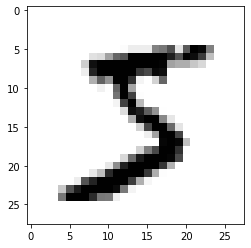

In [5]:
print('图片:')
print(type(train_dataset[0][0]))
print(train_dataset[0][0])
print('标签:')
print(type(train_dataset[0][1]))
print(train_dataset[0][1])

plt.figure()
plt.imshow(train_dataset[0][0].reshape([28,28]),cmap=plt.cm.binary)
plt.show()

In [6]:
network=paddle.nn.Sequential(
    paddle.nn.Flatten(),      #拉平
    paddle.nn.Linear(784,512), #隐层，线性变换层
    paddle.nn.ReLU(),
    paddle.nn.Linear(512,10)
)

In [7]:
model=paddle.Model(network)

model.summary((1,28,28))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Flatten-1       [[1, 28, 28]]           [1, 784]              0       
   Linear-1          [[1, 784]]            [1, 512]           401,920    
    ReLU-1           [[1, 512]]            [1, 512]              0       
   Linear-2          [[1, 512]]            [1, 10]             5,130     
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.55
Estimated Total Size (MB): 1.57
---------------------------------------------------------------------------



{'total_params': 407050, 'trainable_params': 407050}

In [8]:
model.prepare(paddle.optimizer.Adam(learning_rate=0.001,parameters=network.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())
model.fit(train_dataset,
          eval_dataset,
          epochs=5,
          batch_size=64,
          verbose=1
)

The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/5


D:\anconda\lib\site-packages\paddle\fluid\layers\utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.2293 - acc: 0.9136 - 16ms/step          
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0274 - acc: 0.9593 - 11ms/step          
Eval samples: 10000
Epoch 2/5
step 938/938 [==============================] - loss: 0.0664 - acc: 0.9598 - 22ms/step          
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0304 - acc: 0.9627 - 12ms/step          
Eval samples: 10000
Epoch 3/5
step 938/938 [==============================] - loss: 0.0294 - acc: 0.9686 - 24ms/step          
Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 157/157 [==============================] - loss: 0.0176 - acc: 0.9683 - 11ms/s

In [9]:
result=model.evaluate(eval_dataset,verbose=1)
print(result)

Eval begin...
The loss value printed in the log is the current batch, and the metric is the average value of previous step.
step 10000/10000 [==============================] - loss: 8.3447e-07 - acc: 0.9739 - 4ms/step          
Eval samples: 10000
{'loss': [8.3446537e-07], 'acc': 0.9739}


Predict begin...
step 10000/10000 [==============================] - 4ms/step          
Predict samples: 10000


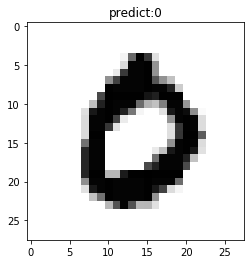

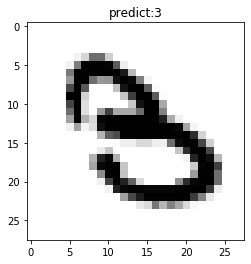

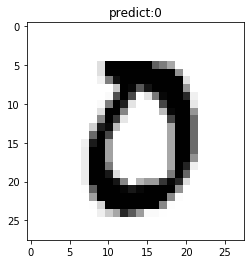

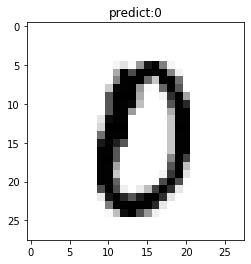

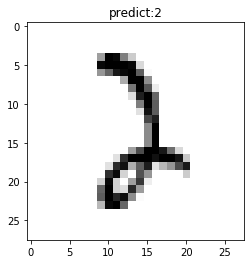

In [10]:
result=model.predict(eval_dataset)
def show_img(img,predict):
    plt.figure()
    plt.title('predict:{}'.format(predict))
    plt.imshow(img.reshape([28,28]),cmap=plt.cm.binary)
    plt.show()
indexs=[3,18,28,55,244]

for idx in indexs:
    show_img(eval_dataset[idx][0],np.argmax(result[0][idx]))

In [11]:
model.save('mist')